In [492]:
import numpy as np
import skimage.io as skio
import matplotlib.pyplot as plt
import cv2 as cv

It turns out that the homography actually works better with 4 points on the surface. I unlabelled 4 other points that I had.

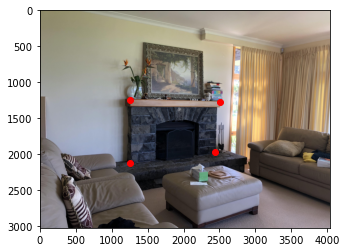

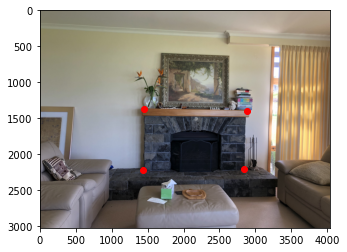

In [493]:
im1 = skio.imread('./fireplace0.jpg')
im2 = skio.imread('./fireplace1.jpg')

im1_pts = np.array([[1255, 1240],
                    [2507, 1271],
                    [2441, 1974],
                    [1259, 2117],
#                     [1726, 2304],
#                     [2529, 2154],
#                     [3080, 2387],
#                     [2170, 2600]
                   ])
im2_pts = np.array([[1452, 1366],
                    [2885, 1396],
                    [2843, 2206],
                    [1443, 2225], 
#                     [1421, 2453],
#                     [2476, 2428],
#                     [2725, 2772],
#                     [1353, 2843]
                   ])

plt.scatter(im1_pts[:,0], im1_pts[:,1], c='red')
plt.imshow(im1, cmap='gray')
plt.show()

plt.scatter(im2_pts[:,0], im2_pts[:,1], c='red')
plt.imshow(im2, cmap='gray')
plt.show()


In [494]:
"""
Defines a homography matrix s.t. im2_pts = H * im1_pts.
"""
def computeH(im1_pts, im2_pts):
    assert len(im1_pts) == len(im2_pts)
    n = len(im1_pts)
    A = []
    b = []
    for i in range(n):
        x, y = im1_pts[i]
        x2, y2 = im2_pts[i]
        
        ax = np.array([-x, -y, -1, 0, 0, 0, x2*x, x2*y]).T
        ay = np.array([0, 0, 0, -x, -y, -1, y2*x, y2*y]).T
        
        A.append(ax)
        A.append(ay)
        b.extend(np.array([[-x2], [-y2]]))
        
    A = np.array(A)
    b = np.array(b)
    H = np.vstack((np.linalg.lstsq(A, b, rcond=None)[0], np.array([1])))
    return np.reshape(H, (3, 3))

H = computeH(im1_pts, im2_pts)
print("H from LS: \n", H)

H from LS: 
 [[ 6.37817037e-01 -7.21189795e-02  4.77696125e+02]
 [-1.43585158e-01  7.08773661e-01  4.19642194e+02]
 [-1.03303986e-04 -4.16690581e-05  1.00000000e+00]]


[[1452.00000004 1365.99999991]
 [2885.00000009 1395.99999999]
 [2842.99999995 2205.99999975]
 [1442.99999989 2224.99999969]]


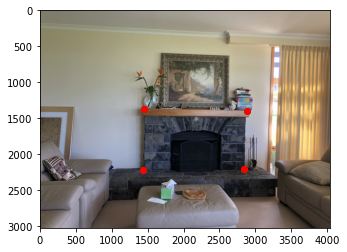

In [495]:
## Test that our homography actually works ##
H_ground = cv.findHomography(im1_pts, im2_pts)[0]
in_test = np.vstack((im1_pts.T, np.ones((1, 4))))
out_test = np.matmul(H, in_test)

out_test[0] = out_test[0] / out_test[2]
out_test[1] = out_test[1] / out_test[2]
out_test = out_test[:2].T

print(out_test)
plt.scatter(im2_pts[:,0], im2_pts[:,1], c='green')
plt.scatter(out_test[:,0], out_test[:,1], c='red')
plt.imshow(im2, cmap='gray')
plt.show()

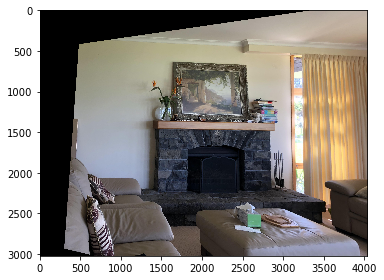

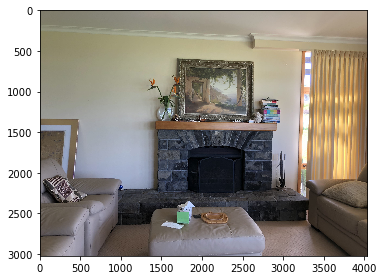

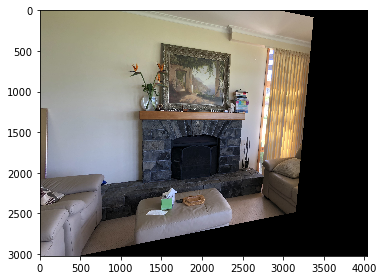

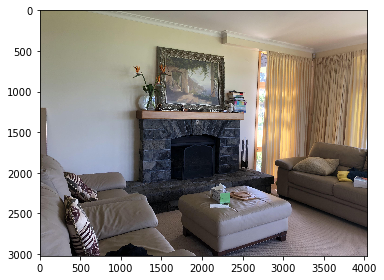

In [496]:
def warpImage(im, H):
    h, w = im.shape[:2]
    indy, indx = np.indices((h, w), dtype=np.float32)
    lin_homg_ind = np.array([indx.ravel(), indy.ravel(), np.ones_like(indx).ravel()])
    # warp the coordinates of src to those of true_dst
    map_ind = H.dot(lin_homg_ind)
    map_x, map_y = map_ind[:-1]/map_ind[-1]  # ensure homogeneity
    map_x = map_x.reshape(h, w).astype(np.float32)
    map_y = map_y.reshape(h, w).astype(np.float32)
    dst = cv.remap(im, map_x, map_y, cv.INTER_LINEAR)
    return dst

warpd = warpImage(im1, np.linalg.inv(H))
skio.imshow(warpd)
skio.imsave('warp1.png', warpd)
skio.show()
skio.imshow(im2)
skio.show()
warpd = warpImage(im2, H)
skio.imshow(warpd)
skio.imsave('warp2.png', warpd)
skio.show()
skio.imshow(im1)
skio.show()

    

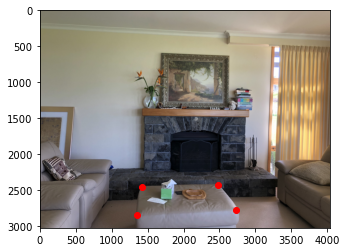

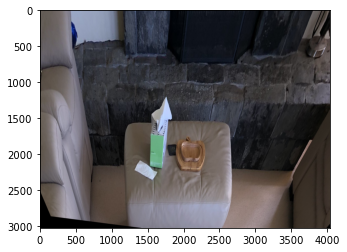

In [497]:
sofa_pts = np.array([
            [1421, 2453],
            [2476, 2428],
            [2725, 2772],
            [1353, 2843]
                   ])

center_pts = np.array([
                [0.30, 0.30], 
                [0.65, 0.30],
                [0.65, 0.65],
                [0.30, 0.65]
                ])
center_pts = np.multiply(center_pts, (im2.shape[1], im2.shape[0]))
center_pts[:,1] += 700
plt.scatter(sofa_pts[:,0], sofa_pts[:,1], c='red')
plt.imshow(im2, cmap='gray')
plt.show()

H = computeH(sofa_pts, center_pts)
warped = warpImage(im2, np.linalg.inv(H))
plt.imshow(warped, cmap='gray')
plt.show()

In [498]:
skio.imsave('project_down.png', warped)

### Mosaic projecting onto a plane. Red indicates corresponding points for left image, green for right. ###

(3024, 4032, 4)


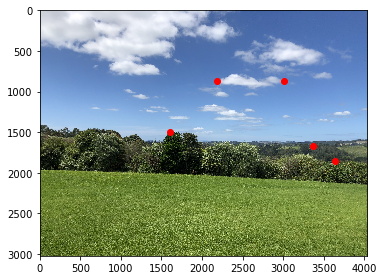

In [466]:
imgs = []
left_pts = np.array([
    [1608, 1499],
    [2179, 868], 
    [3004, 873],
    [3370, 1669],
    [3635, 1859]
])
center_left_pts = np.array([
    [346, 1427],
    [1036, 798],
    [1856, 868],
    [2182, 1637],
    [2388, 1809]
])
center_right_pts = np.array([
    [2020, 1729],
    [2276, 836],
    [3394, 786],
    [3145, 1914]
])
right_pts = np.array([
    [143, 1682],
    [526, 696],
    [1670, 796],
    [1394, 1848]
])

left = skio.imread('NZ0.png')
center = skio.imread('NZ1.png')
right = skio.imread('NZ2.png')

print(left.shape)
plt.scatter(left_pts[:,0], left_pts[:,1], color='red')
skio.imshow(left)
skio.show()

# plt.scatter(center_left_pts[:,0], center_left_pts[:,1], color='red')
# plt.scatter(center_right_pts[:,0], center_right_pts[:,1], color='green')
# skio.imshow(center)
# skio.show()

# plt.scatter(right_pts[:,0], right_pts[:,1], color='green')
# skio.imshow(right)
# skio.show()

In [467]:
## TODO Preprocessing n shit. ###
M_w = 12000
M_h = 6000

off_w = M_w // 2 - center.shape[1] // 2
off_h = M_h // 2 - center.shape[0] // 2
center_mleft_pts = center_left_pts + (off_w, off_h)
center_mright_pts = center_right_pts + (off_w, off_h)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


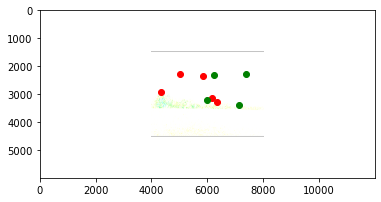

In [471]:
mosaic = np.zeros((M_h, M_w, 4))
mosaic[off_h:off_h+center.shape[0], off_w:off_w+center.shape[1]] = center
plt.scatter(center_mleft_pts[:,0], center_mleft_pts[:,1], color='red')
plt.scatter(center_mright_pts[:,0], center_mright_pts[:,1], color='green')
plt.imshow(mosaic)
plt.show()


In [472]:
H_left = computeH(left_pts, center_mleft_pts)
H_right = computeH(right_pts, center_mright_pts)

mosaic_left = np.zeros((M_h, M_w, 4))
mosaic_left[:left.shape[0], :left.shape[1]] = left
mosaic_right = np.zeros((M_h, M_w, 4))
mosaic_right[:right.shape[0], :right.shape[1]] = right

warped_left = warpImage(mosaic_left, np.linalg.inv(H_left))
warped_right = warpImage(mosaic_right, np.linalg.inv(H_right))

# skio.imshow(warped_left)
# skio.imsave('warped_left.png', warped_left)
# skio.show()
# skio.imshow(mosaic)
# skio.imsave('center.png', mosaic)
# skio.show()
# skio.imshow(warped_right)
# skio.imsave('warped_right.png', warped_right)


In [473]:
not_blended = np.maximum(mosaic, warped_left)
not_blended = np.maximum(not_blended, warped_right)
skio.imsave('brr_mosaic.png', not_blended)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [491]:
alphas = warped_left[:,:,3] + mosaic[:,:,3] + warped_right[:,:,3] 
l_a = warped_left[:,:,3] / alphas
m_a = mosaic[:,:,3] / alphas
r_a = warped_right[:,:,3] / alphas

blended = np.array((M_h, M_w, 3)).T
for i in range(3):
    channel_left = np.multiply(warped_left[:,:,i], l_a)
    channel_cen = np.multiply(mosaic[:,:,i], m_a)
    channel_right = np.multiply(warped_right[:,:,i], r_a)
    blended[i,:,:] = channel_left + channel_cen + channel_right

skio.imsave('pllease.png', blended.T)

/Users/brianliu/opt/miniconda3/envs/tutorial/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/brianliu/opt/miniconda3/envs/tutorial/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brianliu/opt/miniconda3/envs/tutorial/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [479]:
np.array([[1, 2], [1, 2], [1, 2]]) * np.array([1, 2, 3])

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 